# Task 2 (Telco Customer Churn)

1. Load the dataset and understand the available customer attributes.
2. Identify relevant input features that may influence customer churn.
3. Build a model that can estimate the probability of a customer leaving the company.
4. Use the model to classify customer records.

    i. Likely to churn.
    ii. Likely to stay
5. Predict the churn outcome for unseen customer records.
6. Evaluate the performance of your model using appropriate metrics.
7. Analyze the following:

    i. How many churn customers were correctly identified?
    ii. How many non-churn customers were misclassified?
8. Interpret results in business terms:
    i. Is it better to wrongly flag a loyal customer as churn?
    ii. Or miss a customer who is acyually going to Leave?
9. Suggest one improvement to make the prediction more reliable.

In [1]:
# 1.Load the dataset and understand the available customer attributes.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

dd = pd.read_csv('Telco-Customer-Churn.csv')

In [2]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
dd.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
dd.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
dd.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# 2. Identify relevant input features that may influence customer churn.

dd.drop('customerID', axis=1, inplace=True)


In [7]:
dd['TotalCharges'] = pd.to_numeric(dd['TotalCharges'], errors='coerce')
dd['TotalCharges'].fillna(dd['TotalCharges'].median(), inplace=True)


C:\Users\rakes\AppData\Local\Temp\ipykernel_11736\344054154.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd['TotalCharges'].fillna(dd['TotalCharges'].median(), inplace=True)


In [8]:
X = dd.drop('Churn', axis=1)
y = dd['Churn']

In [9]:
# 3. Build a model that can estimate the probability of a customer leaving the company.
X = pd.get_dummies(X, drop_first=True)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


c:\Users\rakes\anaconda31\envs\Himaenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
# 4. Use the model to classify customer records.
# i. Likely to churn. ii. Likely to stay

y_prob = model.predict_proba(X_test)[:, 1]


In [13]:
y_pred = (y_prob >= 0.5).astype(int)


In [14]:
# 5. Predict the churn outcome for unseen customer records.

model.predict_proba(X_test.iloc[[0]])
model.predict(X_test.iloc[[0]])


array(['No'], dtype=object)

In [15]:
from sklearn.metrics import confusion_matrix

# Convert y_test to int if it's currently 'No'/'Yes' strings
if y_test.dtype == 'object':
    y_test_numeric = y_test.map({'No': 0, 'Yes': 1})
else:
    y_test_numeric = y_test

cm = confusion_matrix(y_test_numeric, y_pred)
cm

array([[1163,  131],
       [ 208,  259]])

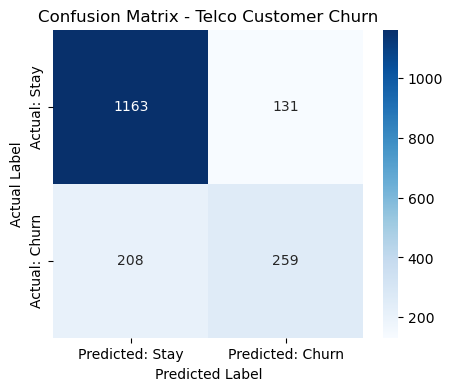

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Stay', 'Predicted: Churn'],
            yticklabels=['Actual: Stay', 'Actual: Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Telco Customer Churn')
plt.show()


In [17]:
# 6.Evaluate the performance of your model using appropriate metrics.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert y_test to int if it's currently 'No'/'Yes' strings
if y_test.dtype == 'object':
    y_test_numeric = y_test.map({'No': 0, 'Yes': 1})
else:
    y_test_numeric = y_test

print("Accuracy:", accuracy_score(y_test_numeric, y_pred))
print("\nClassification Report:\n", classification_report(y_test_numeric, y_pred))


Accuracy: 0.807495741056218

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1294
           1       0.66      0.55      0.60       467

    accuracy                           0.81      1761
   macro avg       0.76      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



In [18]:
TN, FP, FN, TP = cm.ravel()

print("True Negatives (Correctly identified Stay):", TN)
print("False Positives (Wrongly flagged as Churn):", FP)
print("False Negatives (Missed Churn customers):", FN)
print("True Positives (Correctly identified Churn):", TP)


True Negatives (Correctly identified Stay): 1163
False Positives (Wrongly flagged as Churn): 131
False Negatives (Missed Churn customers): 208
True Positives (Correctly identified Churn): 259


In [19]:
# 7. Analyze the following:
# i. How many churn customers were correctly identified?

TP

np.int64(259)

In [20]:
# ii. # ii. How many non-churn customers were misclassified?
FP

np.int64(131)

In [21]:
from sklearn.metrics import recall_score

recall = recall_score(y_test_numeric, y_pred, pos_label=1)
print("Recall (Churn Detection Rate):", recall)

Recall (Churn Detection Rate): 0.5546038543897216


In [22]:
from sklearn.metrics import precision_score

precision = precision_score(y_test_numeric, y_pred, pos_label=1)
print("Precision:", precision)

Precision: 0.6641025641025641


In [23]:
# 9. Suggest one improvement to make the prediction more reliable.
LogisticRegression(class_weight='balanced')


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'
